# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Hande Nur Şen</h2>
<h2>handesen7@gmail.com</h2>
<h4>Deadline: 08/12/2020 9:00 GMT + 3</h4>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analys missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null int64
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null int64
DataPlan           3333 non-null int64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null int64
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3333 non-null float64
dtypes: float64(5), int64(6)
memory usage: 286.5 KB


In [4]:
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

Bütün sütunlar non-null tipinde, bu durum Null değer olmadığını gösteriyor. isnull() fonksiyonuyla yapılan kontrol bu durumu doğruluyor.

In [5]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


Ortalama ile medyan tüm sütunlar için birbirine yakın değerlerlerde, çok fazla outlier yok izlenimi uyandırıyor.

In [32]:
#her bir sütun için varyasyon katsayısı
for column in data:
    print((np.std(data[column])/np.mean(data[column]))*100,column)

242.91194120529403 Churn
39.39663365880334 AccountWeeks
32.75804788134784 ContractRenewal
161.70861022342146 DataPlan
155.85016742681296 DataUsage
84.15960563782461 CustServCalls
30.292970727479073 DayMins
19.97903593348251 DayCalls
29.16884918970437 MonthlyCharge
25.223444000990213 OverageFee
27.267174049778525 RoamMins


# Exploratory Data Analysis

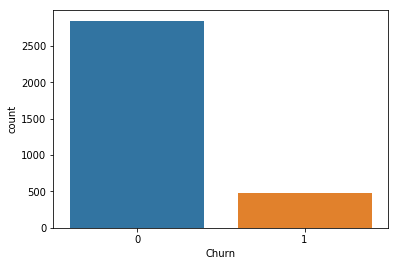

In [45]:
# Our label Distribution (countplot)
sns.countplot(x="Churn", data=data)

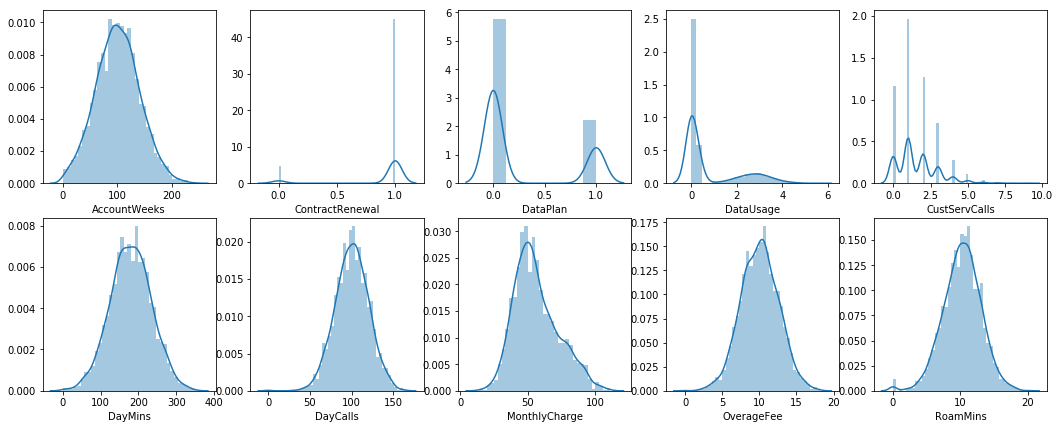

In [43]:
# Example EDA
plt.figure(figsize=(18,7))
plt.subplot(2,5,1)
sns.distplot(data["AccountWeeks"])
plt.subplot(2,5,2)
sns.distplot(data["ContractRenewal"])
plt.subplot(2,5,3)
sns.distplot(data["DataPlan"])
plt.subplot(2,5,4)
sns.distplot(data["DataUsage"])
plt.subplot(2,5,5)
sns.distplot(data["CustServCalls"])
plt.subplot(2,5,6)
sns.distplot(data["DayMins"])
plt.subplot(2,5,7)
sns.distplot(data["DayCalls"])
plt.subplot(2,5,8)
sns.distplot(data["MonthlyCharge"])
plt.subplot(2,5,9)
sns.distplot(data["OverageFee"])
plt.subplot(2,5,10)
sns.distplot(data["RoamMins"])

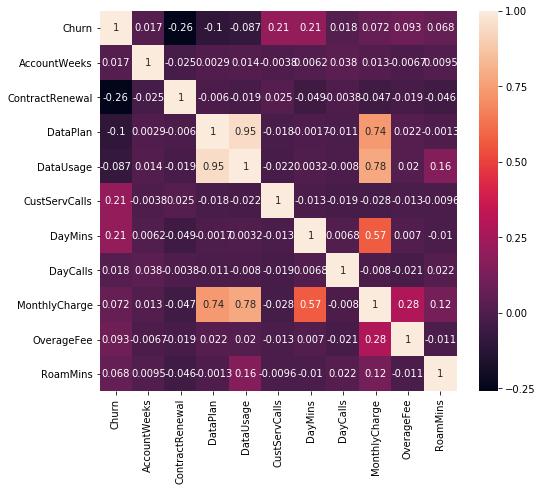

In [22]:
corrMatrix=data.corr()
fig, ax = plt.subplots(figsize=(8,7))  
sns.heatmap(corrMatrix, annot=True)
plt.show()

Değişkenler arasında güçlü bir korelasyon bulunmamakta.

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [52]:
print(data.shape)
print(data.drop_duplicates().shape)

(3333, 11)
(3333, 11)


Verilere baktığımızda müşteri ID'si gibi teklik sağlayan bir değişken gözükmüyor. drop_duplicates() fonksitonuyla tüm değişkenler bazında baktığımızda tekrar eden bir kombinasyon olmadığı gözüküyor.

In [53]:
from sklearn.model_selection import train_test_split

X = data.drop(['Churn'], axis = 1) 
y = data[['Churn']] 
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 7)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [96]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso,LogisticRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

ridge_model = Ridge(alpha = 1)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)

logistic_Regression_model=LogisticRegression(random_state = 42)
logistic_Regression_model.fit(X_train, y_train)

print("Linear Regression Train: ", regression_model.score(X_train, y_train))
print("Linear Regression Test: ", regression_model.score(X_test, y_test))
print('\n--------o--------\n')

print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))
print('\n--------o--------\n')

print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))
print('\n--------o--------\n')

print("Logistic Regression Train: ", logistic_Regression_model.score(X_train, y_train))
print("Logistic Regression Test: ", logistic_Regression_model.score(X_test, y_test))


Linear Regression Train:  0.15898628156911487
Linear Regression Test:  0.20387565915847006

--------o--------

Lasso Train:  0.1584664069345234
Lasso Test:  0.20405654386897554

--------o--------

Ridge Train:  0.15895166062786414
Ridge Test:  0.2044328398331855

--------o--------

Logistic Regression Train:  0.8636948135447922
Logistic Regression Test:  0.85


C:\Users\hande_kcoo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hande_kcoo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1967   36]
 [ 282   48]]


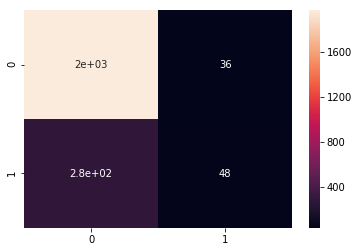

In [101]:
y_pred = logistic_Regression_model.predict(X_train)
print(confusion_matrix(y_train, y_pred))

cm = confusion_matrix(y_train, logistic_Regression_model.predict(X_train))
sns.heatmap(cm, annot=True)

In [103]:
y_pred = logistic_Regression_model.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      2003
           1       0.57      0.15      0.23       330

   micro avg       0.86      0.86      0.86      2333
   macro avg       0.72      0.56      0.58      2333
weighted avg       0.83      0.86      0.83      2333



In [107]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logistic_Regression_model, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.01)


C:\Users\hande_kcoo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hande_kcoo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hande_kcoo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hande_kcoo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hande_kcoo\Anaconda3\lib\site

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model performance.

En başarılı model logisticRegression oldu. Veri hazırlığı aşamasında izlenecek yolu geliştirmek modelin performansını artıracaktır.